## Decision Trees
***

Loading required package: ISLR
Loading required package: tree
Warning message:
"package 'tree' was built under R version 3.5.2"

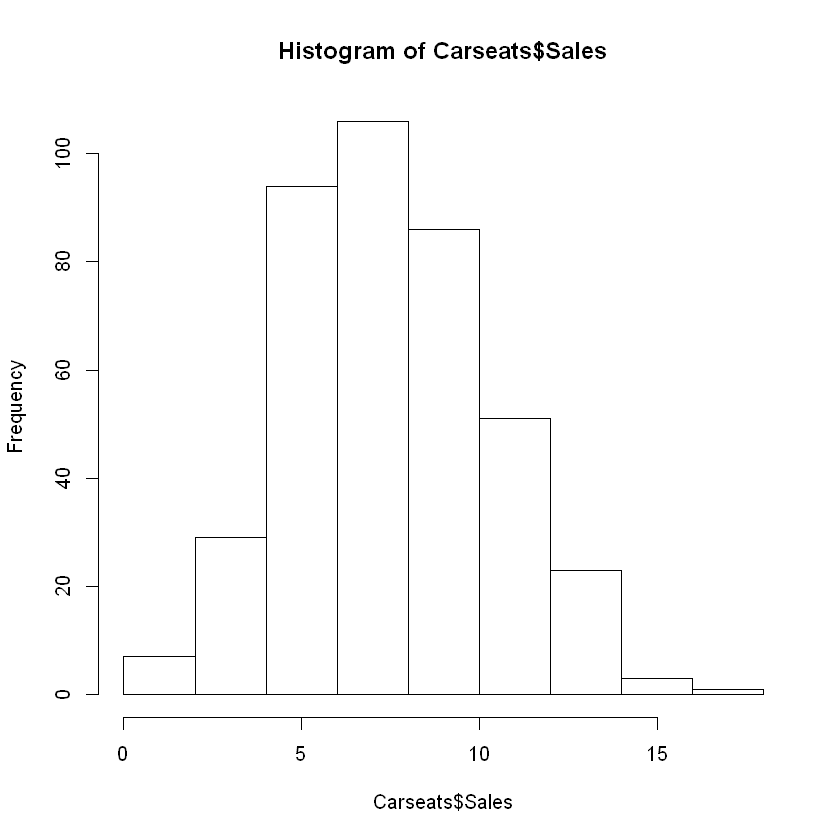

In [3]:
require(ISLR)
require(tree)

hist(Carseats$Sales)

In [3]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [4]:
HighSales <- ifelse(Carseats$Sales>=8,"No","Yes")
Carseats.mod <- data.frame(Carseats,HighSales)
tree.carseats <- tree(HighSales~.-Sales,data = Carseats.mod)
summary(tree.carseats)


Classification tree:
tree(formula = HighSales ~ . - Sales, data = Carseats.mod)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "US"          "Income"      "CompPrice"  
[6] "Population"  "Advertising" "Age"        
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

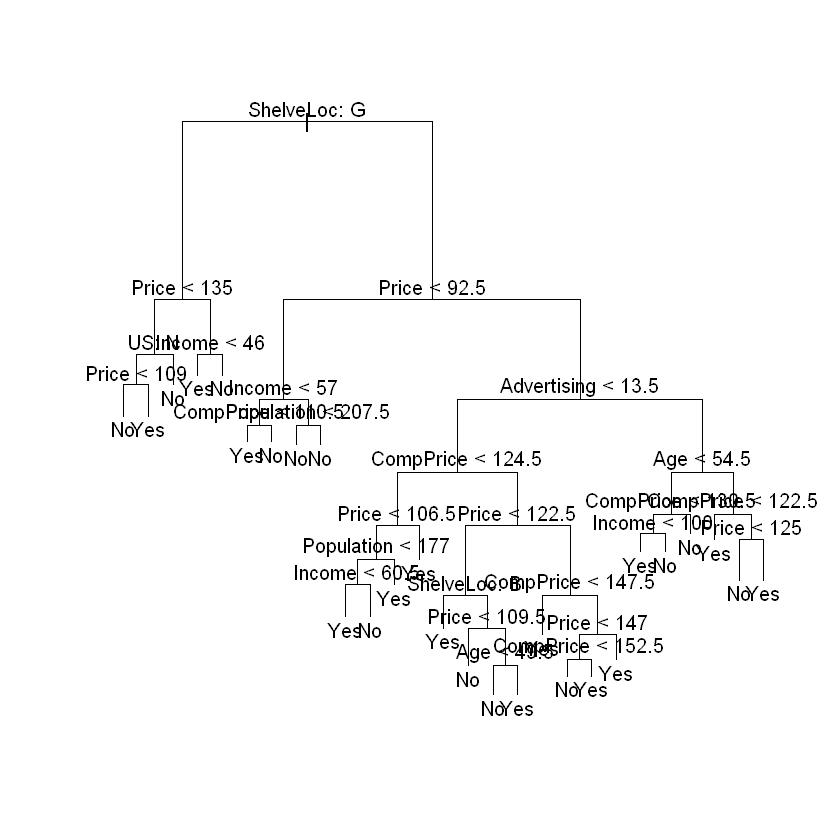

In [5]:
plot(tree.carseats)
text(tree.carseats, pretty = 1)

In [10]:
tree.carseats # Details of the tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 Yes ( 0.41000 0.59000 )  
    2) ShelveLoc: Good 85  90.330 No ( 0.77647 0.22353 )  
      4) Price < 135 68  49.260 No ( 0.88235 0.11765 )  
        8) US: No 17  22.070 No ( 0.64706 0.35294 )  
         16) Price < 109 8   0.000 No ( 1.00000 0.00000 ) *
         17) Price > 109 9  11.460 Yes ( 0.33333 0.66667 ) *
        9) US: Yes 51  16.880 No ( 0.96078 0.03922 ) *
      5) Price > 135 17  22.070 Yes ( 0.35294 0.64706 )  
       10) Income < 46 6   0.000 Yes ( 0.00000 1.00000 ) *
       11) Income > 46 11  15.160 No ( 0.54545 0.45455 ) *
    3) ShelveLoc: Bad,Medium 315 390.600 Yes ( 0.31111 0.68889 )  
      6) Price < 92.5 46  56.530 No ( 0.69565 0.30435 )  
       12) Income < 57 10  12.220 Yes ( 0.30000 0.70000 )  
         24) CompPrice < 110.5 5   0.000 Yes ( 0.00000 1.00000 ) *
         25) CompPrice > 110.5 5   6.730 No ( 0.60000 0.40000 ) *
       13) Income > 57 36  35.470 No ( 0

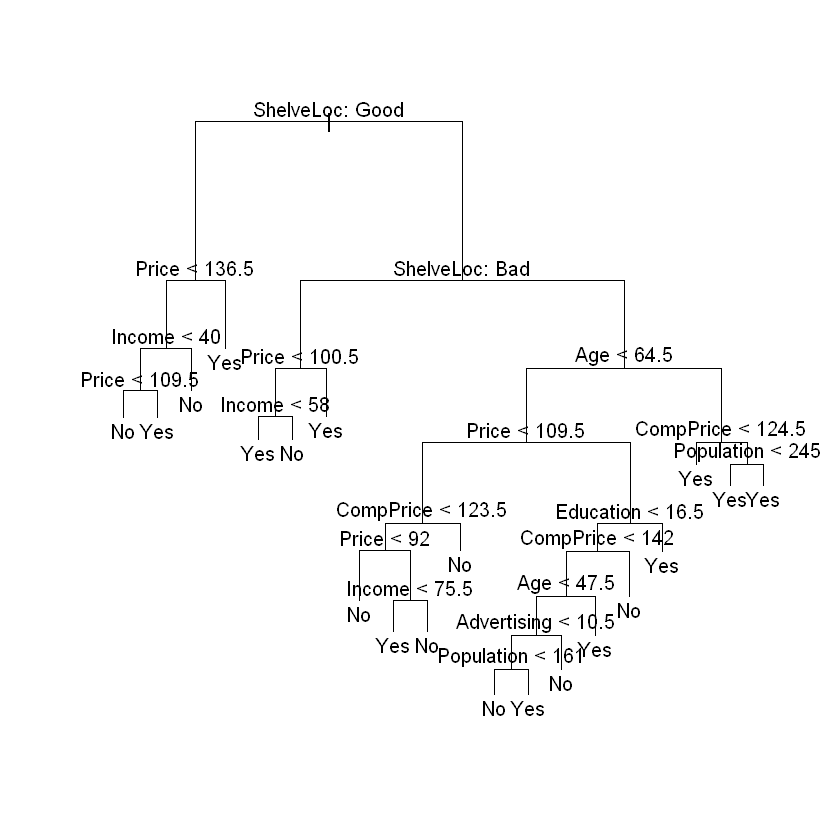

In [21]:
set.seed(150)
train <- sample(1:nrow(Carseats),250)
tree.train.carseats <- tree(HighSales~.-Sales,data = Carseats.mod[train,])
plot(tree.train.carseats);text(tree.train.carseats,pretty = 0)

In [22]:
tree.pred <- predict(tree.train.carseats, newdata = Carseats.mod[-train,],type = "class") #type class to predict the classification not the probabilities
with(Carseats.mod[-train,],table(tree.pred,HighSales))

         HighSales
tree.pred No Yes
      No  45  17
      Yes 21  67

In [23]:
Error <- (17+21)/150
print(Error)

[1] 0.2533333


Error is too high for the given since the tree is too bushy and hence, the variance is very high.

**Cross Validation to prune the tree**

$size
 [1] 20 18 14 13 10  8  6  5  2  1

$dev
 [1] 54 55 53 53 57 57 65 82 82 98

$k
 [1]      -Inf  0.000000  0.500000  1.000000  2.000000  2.500000  3.000000
 [8]  6.000000  7.333333 31.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

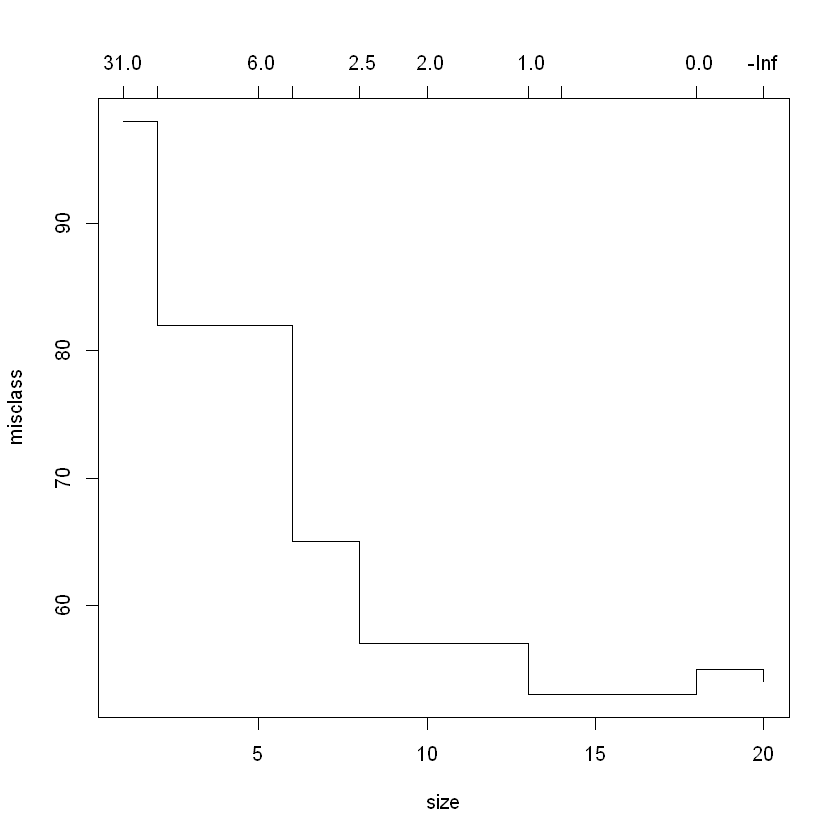

In [25]:
cvtree.carseats <- cv.tree(tree.train.carseats, FUN = prune.misclass) #10 fold cross validation
cvtree.carseats
plot(cvtree.carseats)

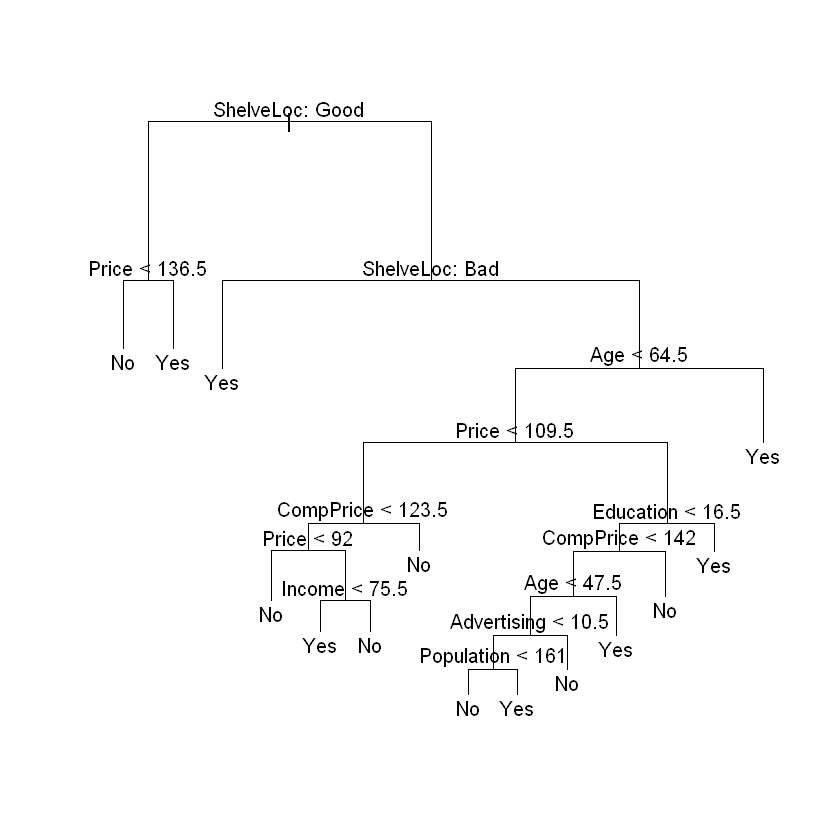

In [27]:
prune.tree <- prune.misclass(tree.train.carseats,best = 14)
plot(prune.tree); text(prune.tree,pretty = 0)

Notice that the tree is much simpler to visualize and interpret

In [29]:
tree.pred.prune <- predict(prune.tree, newdata = Carseats.mod[-train,],type = "class") #type class to predict the classification not the probabilities
with(Carseats.mod[-train,],table(tree.pred.prune,HighSales))

               HighSales
tree.pred.prune No Yes
            No  38  14
            Yes 28  70

In [30]:
(28+14)/150

[1] 0.28

The error rate actually increased during the pruning process. Decision trees are useful for interpretation not for prediction